In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [22]:
# Read the dataset
data = pd.read_excel('D:\\WIU\\2023 Fall\\MATH 589\\Worksheet 3\\DryBean.xlsx')
print(data.head())
print(data.tail())
# Find the rows with missing data
print(data[data.isnull().any(axis=1)])

column_mapping = {col: i for i, col in enumerate(data.columns)}

# Rename the columns
data.rename(columns=column_mapping, inplace=True)

# Print the DataFrame with columns renamed to numbers
print(data)
print(data.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [30]:
print(data[16].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [57]:
print(data[16].unique())
data_copy = data.loc[:,0:15]
y = data.iloc[:, 16].values

y = np.where(data[16] == 'SEKER', 0,
             np.where(data[16] == 'BARBUNYA', 1,
             np.where(data[16] == 'BOMBAY', 2,
             np.where(data[16] == 'CALI', 3,
             np.where(data[16] == 'HOROZ', 4,
             np.where(data[16] == 'SIRA', 5, 6))))))  

data_copy.insert(16,16,y)
print(data_copy)
#data_copy.tail()

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
          0        1           2           3         4         5      6   \
0      28395  610.291  208.178117  173.888747  1.197191  0.549812  28715   
1      28734  638.018  200.524796  182.734419  1.097356  0.411785  29172   
2      29380  624.110  212.826130  175.931143  1.209713  0.562727  29690   
3      30008  645.884  210.557999  182.516516  1.153638  0.498616  30724   
4      30140  620.134  201.847882  190.279279  1.060798  0.333680  30417   
...      ...      ...         ...         ...       ...       ...    ...   
13606  42097  759.696  288.721612  185.944705  1.552728  0.765002  42508   
13607  42101  757.499  281.576392  190.713136  1.476439  0.735702  42494   
13608  42139  759.321  281.539928  191.187979  1.472582  0.734065  42569   
13609  42147  763.779  283.382636  190.275731  1.489326  0.741055  42667   
13610  42159  772.237  295.142741  182.204716  1.619841  0.786693  42600   

               7        

In [67]:
# Filter the dataset to exclude rows with specified values in column 16
values_to_exclude = ['BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
data_filtered = data.loc[~data[16].isin(values_to_exclude)]

#data_filtered.head()
data_filtered.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3344,100846,1297.770,469.285655,274.423910,1.710076,0.811200,102015,358.331013,0.792036,0.988541,0.752442,0.763567,0.004653,0.000976,0.583034,0.997033,BARBUNYA
3345,102015,1271.970,456.791895,286.894421,1.592195,0.778162,103901,360.401904,0.804973,0.981848,0.792356,0.788985,0.004478,0.001070,0.622497,0.991137,BARBUNYA
3346,102379,1296.377,456.722068,286.557574,1.593823,0.778679,104111,361.044307,0.739412,0.983364,0.765523,0.790512,0.004461,0.001075,0.624909,0.995995,BARBUNYA
3347,105542,1265.623,466.135980,288.999342,1.612931,0.784610,107112,366.579116,0.747888,0.985342,0.827993,0.786421,0.004417,0.001042,0.618458,0.997530,BARBUNYA
3348,115967,1359.763,449.454969,331.305270,1.356619,0.675755,118497,384.257427,0.742712,0.978649,0.788166,0.854941,0.003876,0.001277,0.730924,0.991585,BARBUNYA


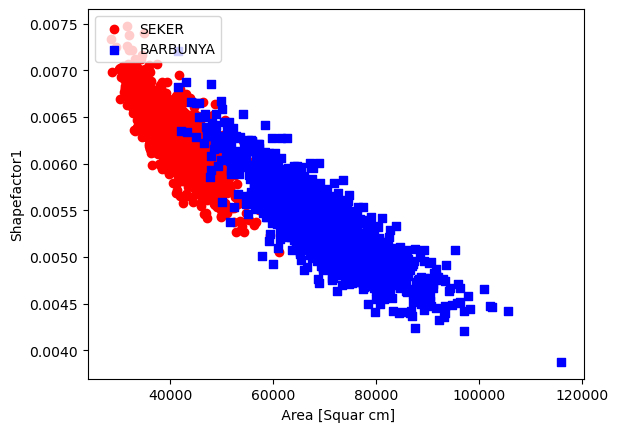

In [68]:
# select SEKER and BARBUNYA
y = data_filtered.iloc[:, 16].values
y = np.where(y == 'SEKER', 0, 1)

# extract Area and Shapefactor 1
X1 = data_filtered.iloc[y == 0, [0, 12]].values
X2 = data_filtered.iloc[y == 1, [0, 12]].values

# plot data
plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='o', label='SEKER')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', marker='s', label='BARBUNYA')

plt.xlabel(' Area [Squar cm]')
plt.ylabel('Shapefactor1')
plt.legend(loc='upper left')
plt.show()

In [74]:
# A function to plot the decision boundary for two variable classifiers

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

Perceptron Classifier


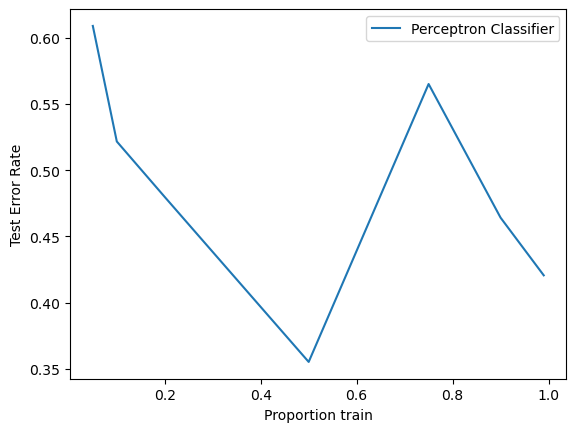

In [75]:
from sklearn.model_selection import train_test_split

# Perceptron algorithm
from sklearn.linear_model import Perceptron

# Size of the test partition
heldout = [0.95, 0.9, 0.8, 0.5, 0.25, 0.1, 0.01]
# Number of trials to check the error
rounds = 10

# extract sepal length and petal length
X = data_filtered.iloc[:, [0, 2]].values

xx = 1.0 - np.array(heldout)

name="Perceptron Classifier"
print(name)
clf=Perceptron(max_iter=100, warm_start=True)
yy = []
for i in heldout:
    yy_ = []
    for r in range(rounds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        yy_.append(1 - np.mean(y_pred == y_test))
    yy.append(np.mean(yy_))
plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()



In [76]:
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

MemoryError: Unable to allocate 465. GiB for an array with shape (14259, 4378700) and data type float64